In [1]:
import numpy as np
import centrex_TlF as ctl
import matplotlib.pyplot as plt

In [2]:
QNc = ctl.states.generate_coupled_states_ground([0,1])
QN = ctl.states.generate_uncoupled_states_ground([0,1])

In [46]:
%%time
ground_states, Hgnd = ctl.hamiltonian.generate_reduced_X_hamiltonian(QNc, 0, 1, rtol = None)

Wall time: 6.75 s


In [47]:
np.all(np.isclose(Hgnd.conj().T, Hgnd))

False

0 1 (-2.0906496262481573e-17+0j) (-2.0906495855589792e-17+0j)
0 2 (-2.279335800290905e-12+0j) (2.2810420161112044e-16+0j)
1 0 (-2.0906495855589792e-17+0j) (-2.0906496262481573e-17+0j)
1 2 (-3.638991038789826e-12+0j) (-3.638991038790233e-12+0j)
2 0 (2.2810420161112044e-16+0j) (-2.279335800290905e-12+0j)
2 1 (-3.638991038790233e-12+0j) (-3.638991038789826e-12+0j)
4 5 (-9.352559392163955e-10+0j) (-9.35940513430428e-10+0j)
4 6 (9.132761755618169e-07+0j) (8.659582772266257e-08+0j)
4 7 (-9.169045089626856e-15+0j) (-9.11668677065373e-15+0j)
4 8 (1.1910669766404508e-10+0j) (1.0211194960270651e-10+0j)
4 9 (5.641560328945676e-06+0j) (-3.814007595891014e-09+0j)
4 10 (-1.0110639543346732e-14+0j) (1.3622886821701105e-15+0j)
4 11 (1.6543158955792476e-21+0j) (1.6521003797571268e-21+0j)
4 12 (-3.667422179622913e-15+0j) (-3.667461846799391e-15+0j)
4 13 (-1.648951341198581e-06+0j) (-3.571437924962351e-13+0j)
4 14 (9.726096578621995e-18+0j) (6.307596576674442e-21+0j)
5 4 (-9.35940513430428e-10+0j) (-9.35

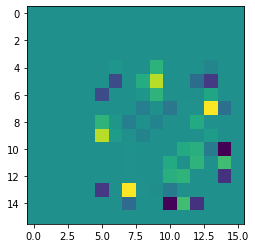

In [48]:
tmp = Hgnd.copy()
np.fill_diagonal(tmp,0)

nz = np.nonzero(tmp)
for i,j in list(zip(*nz))[:len(nz[0])//2]:
    print(i,j,tmp[i,j],tmp[j,i])
    
plt.imshow(tmp.real)

In [51]:
ground_states[5]

1.00-0.00j x |X, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
0.09-0.00j x |X, J = 1, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>

In [49]:
ground_statessform = ctl.hamiltonian.generate_transform_matrix(QN, QNc)

Wall time: 6.48 s


In [23]:
import pickle
with open('UC_to_C_J0to4.pickle', 'rb') as f:
    S_transform_O = pickle.load(f)

In [24]:
np.allclose(S_transform, S_transform[:16,:16])

True

In [25]:
def generate_excited_states_approx(Jlist, Flist, F1list, P, 
                                    I_F = 1/2, I_Tl = 1/2):
    excited_states_approx = [
        ctl.CoupledBasisState(F,mF,F1,J,I_F,I_Tl, electronic_state='B', P = P, 
                            Omega = 1)
        for J,F1,F in zip(Jlist, F1list, Flist)
        for mF in np.arange(-F, F+1)
        ]
    return excited_states_approx

QNce = generate_excited_states_approx([1], [1], [3/2], P=-1)

In [7]:
%%time
excited_states, Hexc = ctl.hamiltonian.generate_reduced_B_hamiltonian(QNce)

Wall time: 163 ms


In [8]:
excited_states

[1.00 x |B, J = 1, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>,
 1.00 x |B, J = 1, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>,
 1.00 x |B, J = 1, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>]

In [9]:
import sqlite3

In [10]:
con = sqlite3.connect("uncoupled_hamiltonian_X.db")
cur = con.cursor()

In [11]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur. fetchall())

[]


In [12]:
try:
    for table in 'Hff, HSx, HSy, HSz, HZx, HZy, HZz'.split(","):
        table = table.strip()
        cur.execute(f'''CREATE TABLE {table} (J₁ int, mJ₁ int, I1₁ real, m1₁ real, I2₁ real, m2₁ real, J₂ int, mJ₂ int, I1₂ real, m1₂ real, I2₂ real, m2₂ real, value_real real, value_imag real, 
                        unique (J₁, mJ₁, I1₁, m1₁, I2₁, m2₁, J₂, mJ₂, I1₂, m1₂, I2₂, m2₂))''')
except:
    pass

In [13]:
con.commit()

In [14]:
cur.execute("select * from Hff")
values = cur.fetchall()
print(len(values))

0


In [15]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur. fetchall())

[('Hff',), ('HSx',), ('HSy',), ('HSz',), ('HZx',), ('HZy',), ('HZz',)]


In [46]:
QN = ctl.states.generate_uncoupled_states_ground([0,1,2,3,4,5,6])

In [47]:
from tqdm import tqdm

for table in 'Hff_alt, HSx, HSy, HSz, HZx, HZy, HZz'.split(","):
    table = table.strip()
    if table =='Hff_alt':
        tab = 'Hff_X_alt'
        table = 'Hff'
    elif 'HZ' in table:
        tab = table + '_X'
    else:
        tab = table
    for a in tqdm(QN):
        for b in QN:
            val = (1*a)@(eval(f"ctl.hamiltonian.hamiltonian_terms_uncoupled.{tab}")(b))
            if val != 0:
                try:
                    string = f"{a.J}, {a.mJ}, {a.I1}, {a.m1}, {a.I2}, {a.m2}, {b.J}, {b.mJ}, {b.I1}, {b.m1}, {b.I2}, {b.m2}, {val.real}, {val.imag}"
                    cmd = f"INSERT INTO {table} VALUES ({string})"
                    cur.execute(cmd)
                except Exception as e:
#                     print(a, b, val)
#                     raise e
                    pass
con.commit()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:01<00:00, 121.14it/s]


In [48]:
def generate_uncoupled_hamiltonian_X_sqlite(QN, db):
    con = sqlite3.connect(db)
    H = {}
    with con:
        cur = con.cursor()
        for term in ['Hff', 'HSx', 'HSy', 'HSz', 'HZx', 'HZy', 'HZz']:
            result = np.zeros((len(QN),len(QN)), complex)
            for i,a in enumerate(QN):
                for j in range(i,len(QN)):
                    b = QN[j]
                    string = f"J₁ = {a.J} AND mJ₁ = {a.mJ} AND I1₁ = {a.I1} AND m1₁ = {a.m1} AND I2₁ = {a.I2} AND m2₁ = {a.m2} AND J₂ = {b.J} AND mJ₂ = {b.mJ} AND I1₂ = {b.I1} AND m1₂ = {b.m1} AND I2₂ = {b.I2} AND m2₂ = {b.m2}"
                    cur.execute(f"select value_real, value_imag from {term} WHERE {string}")
                    values = cur.fetchall()
                    if values:
                        values = values[0]
                        result[i,j] = values[0] + 1j*values[1]
                        if i != j:
                            result[j,i] = np.conjugate(values[0] + 1j*values[1])
            H[term] = result.copy()
    return H

In [49]:
%%time
Hsqlite = generate_uncoupled_hamiltonian_X_sqlite(QN, 'uncoupled_hamiltonian_X.db');

Wall time: 13.2 s


In [50]:
%%time
H = ctl.hamiltonian.generate_uncoupled_hamiltonian_X(QN);

Wall time: 50.3 s


In [51]:
H.keys()

dict_keys(['Hff', 'HSx', 'HSy', 'HSz', 'HZx', 'HZy', 'HZz'])

In [52]:
for term in Hsqlite.keys():
    print(np.allclose(Hsqlite[term], H[term]))

True
True
True
True
True
True
True


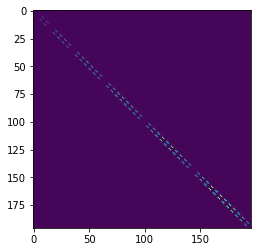

In [53]:
tmp = H['Hff'].copy()
np.fill_diagonal(tmp,0)

# nz = np.nonzero(tmp)
# for i,j in list(zip(*nz))[:len(nz[0])//2]:
#     print(i,j,tmp[i,j],tmp[j,i])
    
plt.imshow(tmp.real)

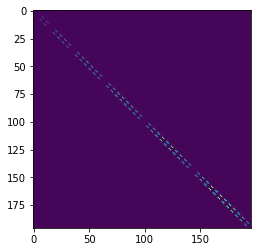

In [54]:
tmp = Hsqlite['Hff'].copy()
np.fill_diagonal(tmp,0)

# nz = np.nonzero(tmp)
# for i,j in list(zip(*nz))[:len(nz[0])//2]:
#     print(i,j,tmp[i,j],tmp[j,i])
    
plt.imshow(tmp.real)